**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [221]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import KDTree
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [222]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metrical = 'euclid'):
        self.neighbors = n_neighbors
        self.algo = algorithm
        self.metrica = metrical
    def fit(self, X, y):
        self.pos = X
        self.classes = y
        if(self.algo == 'kd_tree'):
            self.tree = KDTree(X, leaf_size=2)    
    def predict(self, X):
        if (self.algo == 'brute'):
            if (self.metrica == 'euclid'):
                result = np.argpartition(euclidean_distances(X, self.pos),self.neighbors,axis=1)[:,:self.neighbors]
                return np.apply_along_axis(lambda k:np.bincount(k).argmax(),1, self.classes[result])
            else:
                result = np.argpartition(cosine_distances(X, self.pos),self.neighbors,axis=1)[:,:self.neighbors]
                return np.apply_along_axis(lambda k:np.bincount(k).argmax(),1, self.classes[result])
        else:
            result = self.tree.query(X,k=self.neighbors, return_distance=False)
            return np.apply_along_axis(lambda k:np.bincount(k).argmax(),1, self.classes[result])
            #return np.apply_along_axis(lambda k:np.bincount(k).argmax(),1, self.classes[ind])

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [223]:
iris = datasets.load_iris()

In [224]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [225]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [226]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [227]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [228]:
%time clf.fit(X_train, y_train)

Wall time: 994 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [229]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [230]:
%time clf.predict(X_test)

Wall time: 3.99 ms


array([0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1])

In [231]:
%time my_clf.predict(X_test)

Wall time: 963 µs


array([0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [232]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [233]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [234]:
%time clf.fit(X_train, y_train)

Wall time: 7.98 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [235]:
%time my_clf.fit(X_train, y_train)

Wall time: 997 µs


In [236]:
%time clf.predict(X_test)

Wall time: 5.98 ms


array([1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1])

In [237]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1], dtype=int64)

In [238]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [239]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [240]:
data = newsgroups['data']
target = newsgroups['target']
data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [257]:
vector = CountVectorizer(max_df = 0.3)
matrix = vector.fit_transform(data)
matrix.shape

(11314, 101606)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [258]:
cv = KFold(n_splits=3)

In [259]:
parts = cv.split(target)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [260]:
def score(data, target,vector, metric = 'euclid'):
    cv = KFold(n_splits=3)
    middle_accuracy_score = []
    for i in range (1,10):
        result = []
        for ind_train, indtest in cv.split(target):
            my_clf = MyKNeighborsClassifier(i, algorithm='brute',metrical= metric)
            X_train =vector.fit_transform(np.array(data)[ind_train.astype(int)])
            Y_train = target[ind_train]
            X_test = vector.transform(np.array(data)[indtest.astype(int)])
            Y_test = target[indtest]
            my_clf.fit(X_train, Y_train)
            predict = my_clf.predict(X_test)
            result.append(accuracy_score(predict,Y_test))
        middle_accuracy_score.append(np.asarray(result).mean())
    return middle_accuracy_score

In [261]:
result = score(data, target,vector =vector,metric = 'euclid')
print(result)


[0.23908412876111051, 0.19515637609075753, 0.19400709157034499, 0.1892341733939286, 0.1906481943135643, 0.19162031612014782, 0.19215060911634332, 0.18790803080456522, 0.18711286080381817]


In [262]:
np.asarray(result[1:]).argmax()+2

2

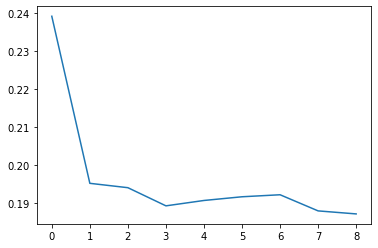

In [263]:
plt.plot(result)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [264]:
result =  score(data, target,vector =vector,metric = 'cosinus')
print(result)

[0.4553646275800727, 0.4298211856422462, 0.4322073986711297, 0.439366389271101, 0.44413956522395287, 0.4505914281929994, 0.4553643932378586, 0.45571773442821767, 0.45801576448195047]


In [265]:
newsgroup = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [266]:
data = newsgroups['data']
target = newsgroups['target']

In [267]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(data)
matrix.shape

(11314, 101631)

In [268]:
result = score(data, target,vector =vectorizer,metric = 'cosinus')
print(result)

[0.5983743071320928, 0.5582454057911961, 0.567968357989415, 0.5728293888383179, 0.5726529525853524, 0.5707965873024577, 0.5707968685131145, 0.5707087089721854, 0.5713271615093101]


In [269]:
np.asarray(result[1:]).argmax()+2

4

#### Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [270]:
newsgroup = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [271]:
data_test = newsgroups['data']
target_test = newsgroups['target']
data_train = newsgroup['data']
target_train = newsgroup['target']

In [272]:
vectorizer = TfidfVectorizer()
matrix_train = vectorizer.fit_transform(data_train)
matrix_test = vectorizer.transform(data_test)

In [273]:
my_clf = MyKNeighborsClassifier(n_neighbors=9, algorithm='brute', metrical = 'cosinus',)
my_clf.fit(matrix_train, target_train)
my_predict = my_clf.predict(matrix_test)
accuracy_score(my_predict, target_test)

0.5103558151885289

In [ ]:
#### Да, точность отличается от кросс-валидации, потому что присутствуют отличия в те